In [2]:
import numpy
import sklearn 
import matplotlib.pyplot as plt 

In [3]:
b = numpy.load('tia-2024/train.npz')
print(b.files)
b['x_train']

['x_train', 'y_train']


array([[  520.12706616,   427.09207347, -4546.76300929, ...,
          535.34178248,  8169.69824164, -5711.42493273],
       [-3277.48319133,  1643.80242569, -1724.23240129, ...,
         1260.48215251,  4613.89453816,   219.08471741],
       [ 3709.56431097,  -778.66620875, -3168.806727  , ...,
         2944.97767647, 10335.37537687,   139.53336234],
       ...,
       [ 3211.2965545 , -1017.21566933, -1181.32959941, ...,
         2337.19402955,   382.37167508,   319.97861073],
       [ 1164.68184097, -1179.72715643, -1237.35725723, ...,
         2633.53309608,  5779.40347185, -1299.31007673],
       [-1229.9676672 , -1724.73787422,   917.55965129, ...,
        -1544.7268976 ,   568.84955681,  -963.10774329]],
      shape=(56000, 784))

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X = b['x_train']
y = b['y_train']

x_train, x_val, y_train, y_val = train_test_split(X,y,test_size=0.2)


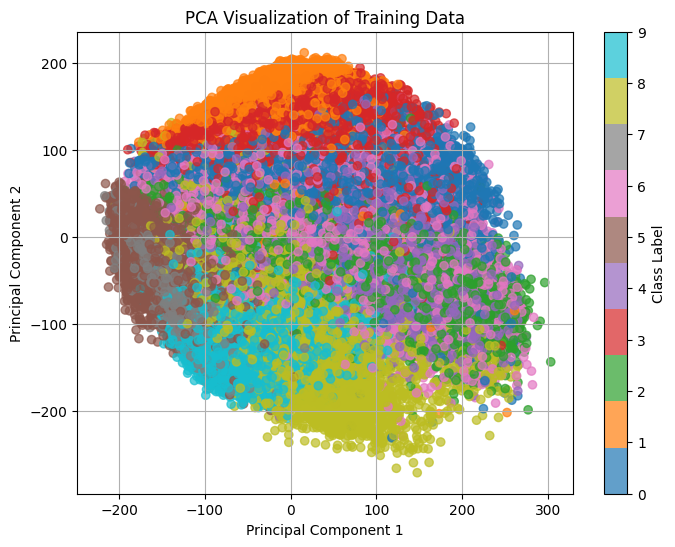

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
X_normalized = X / 255.0
pca = PCA(n_components=2)  # For 2D plotting
X_pca= pca.fit_transform(X_normalized)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label='Class Label')
plt.title("PCA Visualization of Training Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

In [7]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print("Label Distribution:")
for label, count in zip(unique, counts):
    print(f"Label {label}: {count}")


Label Distribution:
Label 0: 4499
Label 1: 4487
Label 2: 4465
Label 3: 4428
Label 4: 4494
Label 5: 4462
Label 6: 4468
Label 7: 4560
Label 8: 4544
Label 9: 4393


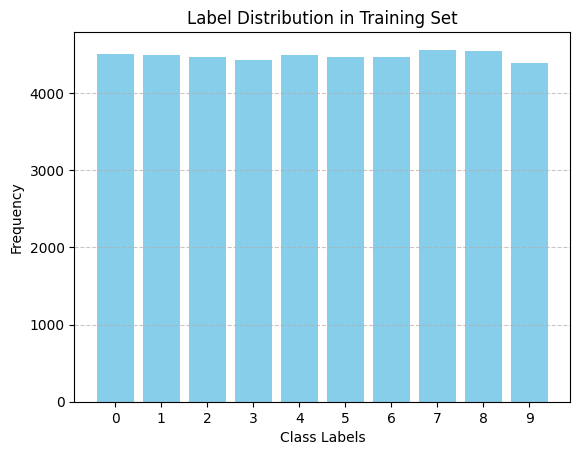

In [8]:
import matplotlib.pyplot as plt

plt.bar(unique, counts, color='skyblue')
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.title("Label Distribution in Training Set")
plt.xticks(unique)  # Show each label on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [9]:
svm = SVC(C=0.1)
svm.fit(x_train,y_train)

SVC(C=0.1)

In [1]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
y_pred = svm.predict(x_val)


NameError: name 'svm' is not defined

In [ ]:
acc = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
print("Accuracy: ", acc)
print("f1: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)



In [ ]:
svc = SVC(C=6, gamma=1.5)
svc.fit(x_train_scaled, y_train)

y_pred = svc.predict(x_val_scaled)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
print("Accuracy: ", acc)
print("f1: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)

In [6]:
from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(x_train, y_train)

print("Best C:", grid.best_params_['C'])


Best C: 10


In [24]:
import pandas as pd

# Convert x_train_scaled (NumPy array) to Pandas DataFrame
# Replace 'feature_names' with actual feature names if available
x_train_scaled_df = pd.DataFrame(
    x_train_scaled,
    columns=[f'Feature_{i}' for i in range(x_train_scaled.shape[1])]  # Generic column names
)

# Calculate correlation matrix
correlation_matrix = x_train_scaled_df.corr()

# Find features with high correlation
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:  # Adjust threshold as needed
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Drop correlated features
x_train_scaled_df = x_train_scaled_df.drop(columns=correlated_features)

# Transform the DataFrame back into a NumPy array
x_train_scaled_cleaned = x_train_scaled_df.values

# Print details
print("Dropped correlated features:", correlated_features)
print("Original shape:", x_train_scaled.shape)
print("New shape after removing correlated features:", x_train_scaled_cleaned.shape)


Dropped correlated features: set()
Original shape: (44800, 784)
New shape after removing correlated features: (44800, 784)


In [45]:
# Acum ca am aflat C = 10 optim, dam fit pe datele normalizate cu acesta
svc = SVC(C=6)
svc.fit(x_train_scaled_cleaned, y_train)

y_pred = svc.predict(x_val_scaled)


In [47]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
print("Accuracy: ", acc)
print("f1: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.9004464285714285
f1:  0.9001651517955228
Precision:  0.9002539904911773
Recall:  0.9004464285714285


In [15]:
print(type(x_train_scaled))  # Check if this is a DataFrame
print(type(x_val_scaled))  # Check if this is a DataFrame


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [27]:
import pandas as pd

# Convert x_train_scaled (NumPy array) to Pandas DataFrame
# Replace 'feature_names' with actual feature names if available
x_val_scaled_df = pd.DataFrame(
    x_val_scaled,
    columns=[f'Feature_{i}' for i in range(x_val_scaled.shape[1])]  # Generic column names
)

# Calculate correlation matrix
correlation_matrix = x_val_scaled_df.corr()

# Find features with high correlation
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:  # Adjust threshold as needed
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Drop correlated features
x_val_scaled_df = x_val_scaled_df.drop(columns=correlated_features)

# Transform the DataFrame back into a NumPy array
x_val_scaled_cleaned = x_val_scaled_df.values

# Print details
print("Dropped correlated features:", correlated_features)
print("Original shape:", x_val_scaled.shape)
print("New shape after removing correlated features:", x_val_scaled_cleaned.shape)


Dropped correlated features: set()
Original shape: (11200, 784)
New shape after removing correlated features: (11200, 784)


In [49]:
import numpy as np

x_final_train = np.concatenate([x_train_scaled_cleaned, x_val_scaled_cleaned], axis=0)
y_final_train = np.concatenate([y_train, y_val], axis=0)
print(np.shape(x_final_train))
print(np.shape(y_final_train))

(56000, 784)
(56000,)


In [53]:
b = numpy.load('tia-2024/test.npz')
print(b.files)
x_test = b['x_test']

['x_test']


In [50]:
# Antrenam pe intregul set
svc = SVC(C=6,gamma=1.5)
svc.fit(x_final_train, y_final_train)

SVC(C=6)

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(x_test)

In [58]:
y_pred = svc.predict(x_test_scaled)

In [59]:
import pandas as pd

# Example: Replace these with your actual data
ids = range(0, len(y_pred))  # Sequential IDs starting from 0
# Create a DataFrame
submission = pd.DataFrame({
    'Id': ids,        # First column: Id
    'Label': y_pred   # Second column: Label
})

# Save the DataFrame to a CSV file
submission.to_csv('submissionC6v3.csv', index=False)

print("Submission saved to 'submissionC6v3.csv'")


Submission saved to 'submissionC6v2.csv'


In [24]:
# Gridsearchcv dar de data asta pe datele normate, si cu mai multi C
from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC

param_grid = {'C': [ 6, 10, 14]}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(x_train_scaled, y_train)

print("Best C:", grid.best_params_['C'])


Best C: 6


In [13]:
# Gridsearchcv dar de data asta pe datele normate, si cu mai multi C
from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC

param_grid = {'C': [5, 6, 7]}
grid = GridSearchCV(SVC(), param_grid, cv=3)
grid.fit(x_train_scaled, y_train)

print("Best C:", grid.best_params_['C'])


Best C: 6


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [6],
    'gamma': [0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(SVC(), param_grid, cv=3)
grid_search.fit(x_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_['C', 'gamma'])
print("Best Score:", grid_search.best_score_)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
# Set specific C and gamma values
C_value = 6
gamma_value = 0.01

# Initialize the SVM model
svc = SVC(C=C_value, gamma=gamma_value, kernel='rbf')  # Using RBF kernel here

# Train the model
svc.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = svc.predict(x_val_scaled)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_val, y_pred))


In [14]:
# Access GridSearchCV results as a DataFrame
import pandas as pd

results = pd.DataFrame(grid.cv_results_)

# Sort by the mean test score and get the top N parameter combinations
top_n = 5  # Change this to the number of top results you want
top_params = results.sort_values(by='mean_test_score', ascending=False).head(top_n)

# Display the top parameter combinations and their scores
print(top_params[['mean_test_score', 'params']])


   mean_test_score    params
1         0.897031  {'C': 6}
0         0.896540  {'C': 5}
2         0.896406  {'C': 7}
